# Assessing Similarity using Graph Structures

A graph is a data structure consisting of nodes (vertices) and nodes (branches) that indicate the connection between the nodes. The chemical structure can be represented by this graph. In other words, we can represent atoms in a graph 
with nodes and bonds as edges

Fingertips like those introduced in chapter 6 are often used to evaluate the similarity between molecules, but there is also a method to evaluate similarity using a graph structure. The MCS (Maximum Common Substructure) introduced next refers to the common substructure of the target molecule set. 



In [5]:
import os
from rdkit import Chem
from rdkit.Chem import RDConfig
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

filepath = os.path.join(os.path.abspath('.'), 'cdk2.sdf')


In [6]:
filepath

'/home/oohnohnoh1/Desktop/GIT/Chemiinformatics_work/notebooks/cdk2.sdf'

In [7]:
mols = [mol for mol in Chem.SDMolSupplier(filepath)]

In [8]:
mols

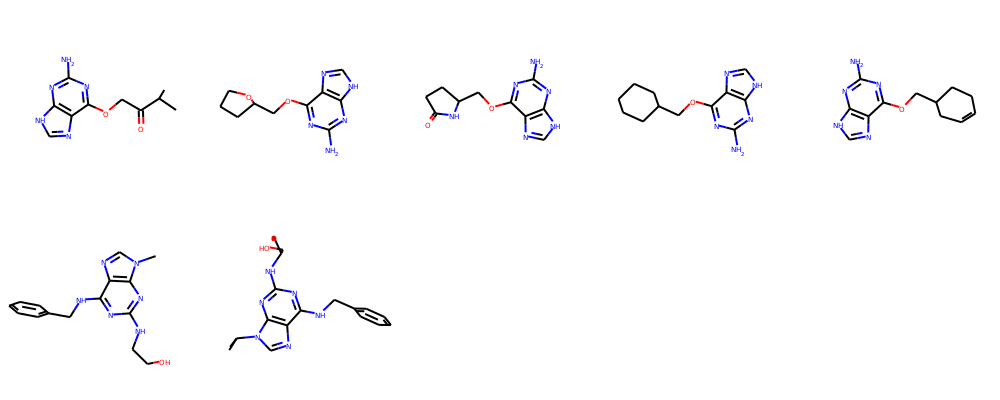

In [9]:

Draw.MolsToGridImage(mols[:7], molsPerRow = 5 )

The MCS (Maximum Common Substructure) introduced next refers to the common substructure of the target molecule set

With RDkit, you can specify multiple options for how to get MCS. The following shows an example of each option



In [12]:
result1 = rdFMCS.FindMCS(mols[:7])
mcs1 = Chem.MolFromSmarts(result1.smartsString)
mcs1
print(result1.smartsString)

[#6]1:[#7]:[#6](:[#7]:[#6]2:[#6]:1:[#7]:[#6]:[#7]:2)-[#7]


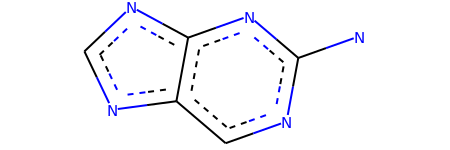

In [14]:
mcs1 # most common structure between all of the structures we have see n

In [17]:
result2 = rdFMCS.FindMCS(mols[:7], atomCompare=rdFMCS.AtomCompare.CompareAny)

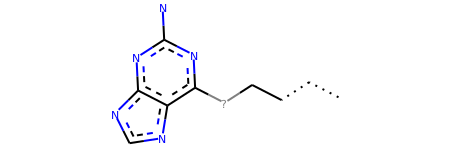

In [22]:
mcs2 = Chem.MolFromSmarts(result2.smartsString)
mcs2 # Second similar structure between all the above structures


In [23]:
print (result2.smartsString)

[#6]-,:[#6]-,:[#6]-[#6]-[#8,#7]-[#6]1:[#7]:[#6](:[#7]:[#6]2:[#6]:1:[#7]:[#6]:[#7]:2)-[#7]


In RDKit, Fraggle Similarity is implemented as an algorithm to quantify based on MCS. By using this, clustering and analysis based on similarity can be preformed 



In [24]:
from rdkit.Chem.Fraggle import FraggleSim

In [25]:
sim, match = FraggleSim.GetFraggleSimilarity(mols[0], mols[1])

In [26]:
sim

0.925764192139738

In [27]:
match

'*C(C)C.*COc1nc(N)nc2[nH]cnc12'

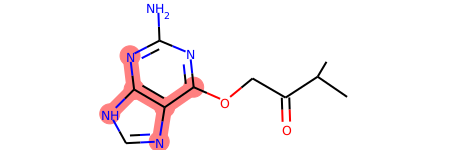

In [35]:
mols[0]

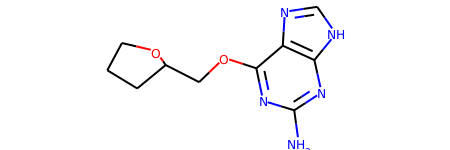

In [36]:
mols[1]

In [30]:
match_st = Chem.MolFromSmiles(match)

In [31]:
match

'*C(C)C.*COc1nc(N)nc2[nH]cnc12'

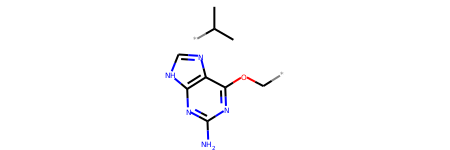

In [33]:
match_st

### Matched Molecular Pair and Matched Molecular Series

At the structural optimization stage of drug discovery research, how to convert the starting compound (lead compound) 
is very important, but as the stage progresses, which structural conversion affects the activity and physical properties 
it is a very important to carry out a retrospective analysis of what it has exerted

Matched Molecular Pair (MMP) is a pair of molecules that differ only in the partial structure of some of the two molecules but are otherwise identical. As an example, 

In [38]:
import sys
import os
import pandas as pd 
from rdkit import Chem
from rdkit.Chem import rdMMPA
from rdkit.Chem import rdBase
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import SaltRemover


mmpapath = os.path.join(RDConfig.RDContribDir, 'mmpa')

In [39]:
mmpapath

'/home/oohnohnoh1/anaconda3/share/RDKit/Contrib/mmpa'

In [42]:
sys.path.append(mmpapath)

In [47]:
df = pd.read_csv('CHEMBL25-chembl_target-UWak-gfoNC40RzEmtpzLeRut8YYLZK3KsSRypDkP1ZI=.csv')
remover = SaltRemover.SaltRemover()
mols = []



In [48]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
